Evolución de los Precios de la Electricidad
===

# Instrucciones

En el archivo `precios.zip`  se encuentran los archivos `Precio_Bolsa_Nacional_($kwh)_ano.xls` en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada realice las siguientes actividades. 

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Debe transformar la tabla de tal forma que quede con las columnas `Fecha`, `Hora` y `Precio` (únicamente tres columnas).

In [128]:
#Import librerias
from zipfile import ZipFile
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [222]:
precios = pd.DataFrame()

archivos= ZipFile('precios.zip')

for datos in archivos.infolist():
    if (datos.filename.endswith('.xlsx') and not(datos.filename.startswith('__MACOSX'))):
        d = pd.read_excel(archivos.open(datos.filename), header=2)
        if d.columns[0].startswith('Unname'):
            nheader = d.iloc[0]
            d = d[1:]
            d = d.rename(columns = nheader)
        d = d.iloc[:,0:25]
        precios = precios.append(d)
df = pd.melt(precios,id_vars='Fecha',var_name = 'Hora', value_name = 'Precio')
df.columns = ['Fecha','Hora','Precio']
df


,Fecha,Hora,Precio
0,1996-01-01,0,25.000000
1,1996-01-02,0,10.000000
2,1996-01-03,0,12.000000
3,1996-01-04,0,12.800000
4,1996-01-05,0,18.000000
...,...,...,...
362539,2004-12-27,23,67.431239
362540,2004-12-28,23,65.931239
362541,2004-12-29,23,65.931239
362542,2004-12-30,23,67.431239


**2.--** Compute e imprima el número de registros con datos faltantes.

In [223]:
df_datosfaltantes = df[df.Precio.notnull()]
print('registros faltantes: ', len(df) - len(df_datosfaltantes))

registros faltantes:  181510


**3.--** Compute e imprima el número de registros duplicados.

In [224]:
df['Fecha'] = pd.to_datetime(df['Fecha'])
df = df.sort_values('Fecha', ascending = True)
df['duplicados'] = df['Fecha'].map(str) +'-'+ df['Hora'].map(str) +'-'+ df['Precio'].map(str) 
reg_duplicados = df[df.duplicated(['duplicados'])]
print('Registros duplicados', len(reg_duplicados))

Registros duplicados 3919


**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [226]:
df = df[df.Precio.notnull()]
df = df[df.Fecha.notnull()]
df = df.drop_duplicates()
len(df)

179275

**5.--** Compute y grafique el precio primedio diario.

Text(0.5, 0, 'Días')

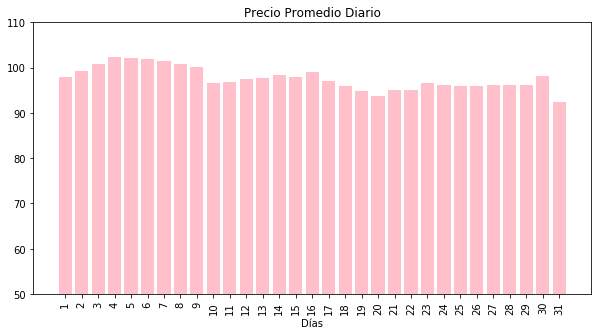

In [227]:
df['mes'] = pd.DatetimeIndex(df['Fecha']).month
df['dias'] = pd.DatetimeIndex(df['Fecha']).day
df.set_index(df["Fecha"],inplace=True)
dfdia = df.groupby('dias').mean()['Precio']
dfmes = df.groupby('mes').mean()['Precio']
plt.figure(figsize=(10,5))
plt.bar(range(len(dfdia)), dfdia, color= "pink")
plt.ylim(50,110) 
plt.xticks(range(len(dfdia)), list(dfdia.index), rotation='vertical')
plt.title('Precio Promedio Diario')
plt.xlabel('Días')

**6.--** Compute y grafique el precio máximo por mes.

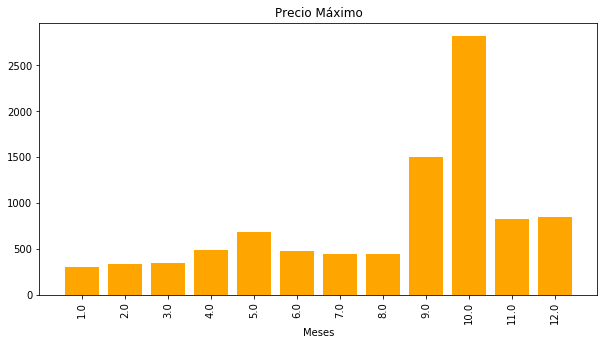

In [228]:
plt.figure(figsize=(10,5))
plt.bar(range(len(dfmesmax)), dfmesmax,color= "orange")
plt.xticks(range(len(dfmesmax)), list(dfmesmax.index), rotation='vertical')
plt.title('Precio Máximo')
plt.xlabel('Meses');

**7.--** Compute y grafique el precio mínimo mensual.

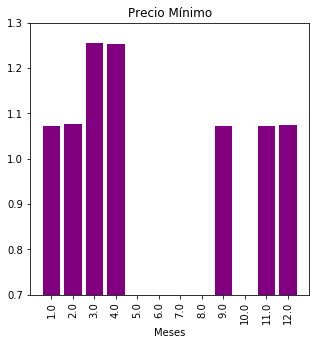

In [229]:

plt.figure(figsize=(5,5))
plt.bar(range(len(dfmesmin)), dfmesmin,color= "purple",)
plt.ylim(0.7,1.3) 
plt.xticks(range(len(dfmesmin)), list(dfmesmin.index), rotation='vertical')
plt.title('Precio Mínimo')
plt.xlabel('Meses');

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

Text(0, 0.5, 'Mes')

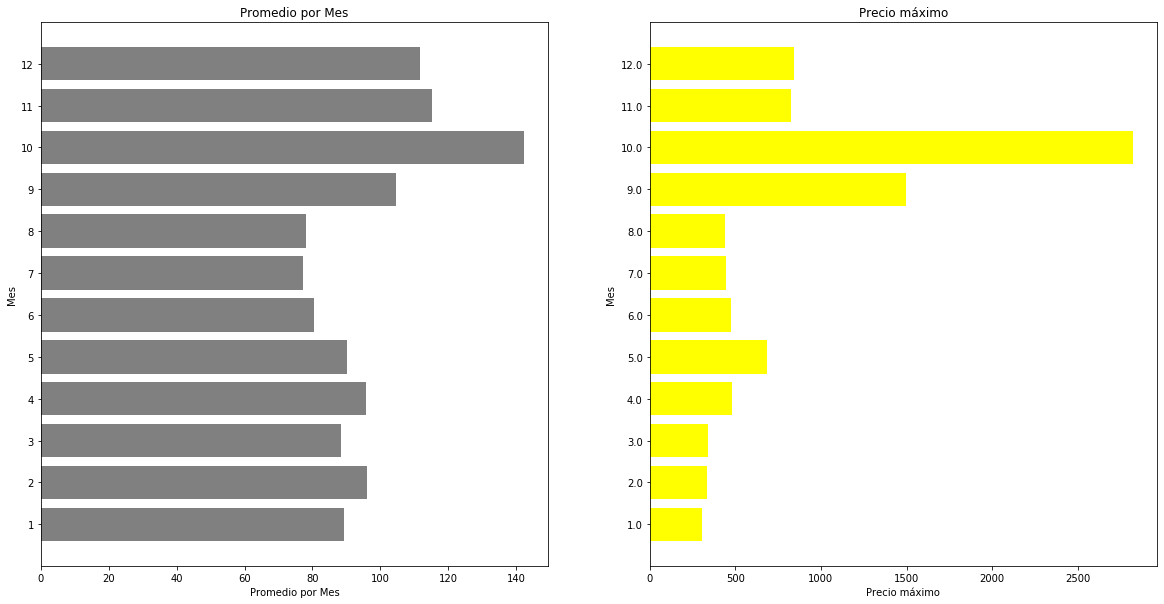

In [230]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.barh(range(len(dfmes)), dfmes,color= "grey")
plt.yticks(range(len(dfmes)), list(dfmes.index), rotation='horizontal')
plt.title('Promedio por Mes')
plt.xlabel('Promedio por Mes')
plt.ylabel('Mes')
plt.subplot(1, 2, 2)
plt.barh(range(len(dfmesmax)), dfmesmax,color= "yellow")
plt.yticks(range(len(dfmesmax)), list(dfmesmax.index), rotation='horizontal')
plt.title('Precio máximo')
plt.xlabel('Precio máximo')
plt.ylabel('Mes')

In [ ]:
09.-- Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

Text(0, 0.5, 'Ocurrencias')

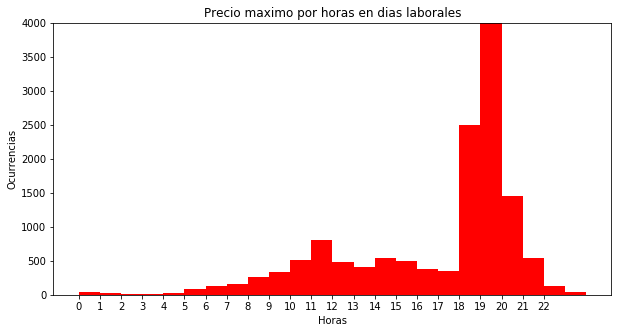

In [267]:
dias_laborales = df.copy()
dias_laborales = dias_laborales.drop(columns=['Fecha', 'duplicados'])
dias_laborales.reset_index(inplace=True)
dias_laborales['Nombre_Dia'] =  dias_laborales[['Fecha']].apply(lambda x: datetime.datetime.strftime(x['Fecha'], '%A'), axis=1)
week_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df_weekdays = dias_laborales[(dias_laborales['Nombre_Dia'] == 'Monday') | (dias_laborales['Nombre_Dia'] == 'Tuesday')| (dias_laborales['Nombre_Dia'] == 'Wednesday')| (dias_laborales['Nombre_Dia'] == 'Thursday')| (dias_laborales['Nombre_Dia'] == 'Friday')]
dias_laborales = df_weekdays.groupby('Fecha').agg({'Precio': np.max}) 
dias_laborales.reset_index(inplace=True)
df3 = pd.merge(df_weekdays, dias_laborales, on=['Fecha','Precio'], how='inner')
hours = list(map(int,df3['Hora'].tolist()))
plt.figure(figsize=(10, 5))
plt.hist(hours, bins = 24,range = (0,24),color = "Red")
plt.xticks(range(23))
plt.ylim(0,4000) 
plt.title('Precio maximo por horas en dias laborales')
plt.xlabel('Horas')
plt.ylabel('Ocurrencias')

**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

Text(0, 0.5, 'Ocurrencia')

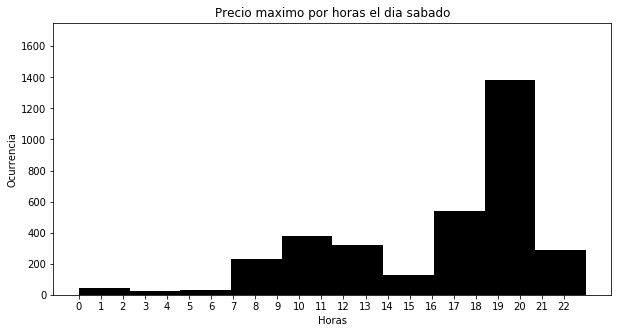

In [274]:
dia_sabado = df.copy()
dia_sabado = dia_sabado.drop(columns=['Fecha', 'duplicados'])
dia_sabado.reset_index(inplace=True)
dia_sabado['Nombre_Dia'] =  dia_sabado[['Fecha']].apply(lambda x: datetime.datetime.strftime(x['Fecha'], '%A'), axis=1)
df_weekdays = dia_sabado[(dia_sabado['Nombre_Dia'] == 'Saturday') ]
dia_sabado = df_weekdays.groupby('Fecha').agg({'Precio': np.max}) 
dia_sabado.reset_index(inplace=True)
df3 = pd.merge(df_weekdays, dia_sabado, on=['Fecha','Precio'], how='inner')
hours = list(map(int,df3['Hora'].tolist()))
plt.figure(figsize=(10, 5))
plt.hist(hours,color = "black")
plt.xticks(range(23))
plt.ylim(0,1750) 
plt.title('Precio maximo por horas el dia sabado')
plt.xlabel('Horas')
plt.ylabel('Ocurrencia')

**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

Text(0, 0.5, 'Cantidad')

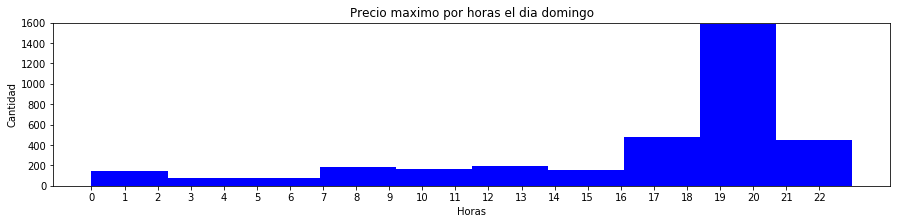

In [288]:
precio_domingo = df.copy()
precio_domingo = precio_domingo.drop(columns=['Fecha', 'duplicados'])
precio_domingo.reset_index(inplace=True)
precio_domingo['Nombre_Dia'] =  precio_domingo[['Fecha']].apply(lambda x: datetime.datetime.strftime(x['Fecha'], '%A'), axis=1)
df_weekdays = precio_domingo[(precio_domingo['Nombre_Dia'] == 'Sunday') ]
precio_domingo = df_weekdays.groupby('Fecha').agg({'Precio': np.max}) 
precio_domingo.reset_index(inplace=True)
df3 = pd.merge(df_weekdays, precio_domingo, on=['Fecha','Precio'], how='inner')
hours = list(map(int,df3['Hora'].tolist()))
plt.figure(figsize=(15, 3))
plt.hist(hours,color = "blue")
plt.xticks(range(23))
plt.ylim(0,1600) 
plt.title('Precio maximo por horas el dia domingo')
plt.xlabel('Horas')
plt.ylabel('Cantidad')

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

In [293]:
precio_bajo = df.copy()
precio_bajo = precio_bajo.drop(columns=['Fecha', 'duplicados', 'mes'])
precio_bajo.reset_index(inplace=True)
precio_bajo['Year'] =  precio_bajo[['Fecha']].apply(lambda x: datetime.datetime.strftime(x['Fecha'], '%Y'), axis=1)
precio_bajo_año = precio_bajo.groupby('Year').agg({'Precio': np.min}) 
precio_bajo_año.reset_index(inplace=True)
precio_bajo_año.columns = ["Year","Precio más Bajo"]
final = pd.merge(precio_bajo_año, precio_bajo, on = ['Year'], how ='inner')
final = final[(final['Precio más Bajo'] == final['Precio'])]
final = final[['Fecha','Precio más Bajo']].drop_duplicates(subset='Precio más Bajo', keep="first")
final.head()

,Fecha,Precio más Bajo
156,1995-07-26,0.000000
17430,1997-07-15,10.882310
26046,1998-07-09,13.847330
32332,1999-03-28,18.359530
41039,2000-03-25,21.531167


**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

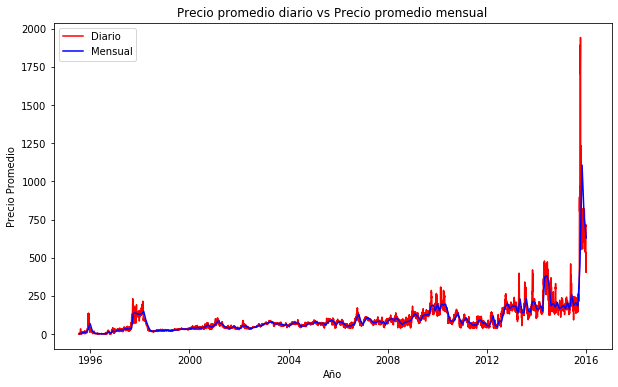

In [305]:
Promedio_diario = df[['Fecha','Precio']].groupby(by = pd.Grouper(key='Fecha', freq='D')).mean()
Promedio_mensual = df[['Fecha','Precio']].groupby(by = pd.Grouper(key='Fecha', freq='M')).mean()
plt.figure(figsize=(10,6))
plt.plot(Promedio_diario, color = "Red")
plt.plot(Promedio_mensual,color = "Blue")
plt.legend(['Diario','Mensual'])
plt.title('Precio promedio diario vs Precio promedio mensual') 
plt.ylabel('Precio Promedio')
plt.xlabel('Año')
plt.show()

---